## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

  ## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline
import re
import plotly.express as px


#PLAY STORE DATA REVIEW EXPLORATORY DATA ANALYSIS

In [ ]:
# Importing Data Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
playstore_df = pd.read_csv('/content/drive/MyDrive/Capstone Project Play store/Copy of Play Store Data.csv')

In [ ]:
user_review = pd.read_csv('/content/drive/MyDrive/Capstone Project Play store/Copy of User Reviews.csv')

##1. Basic Steps to follow

*   Examine Head and Tail of Data Set
*   Shape of Datraset
*   Cheking Data Type of All Columns
*   Summary




In [ ]:
# Printing The Play Store Data Set information
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Printing The User Review Data Set Information
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# Printing The First Five Rows Of The Data Set
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Printing The Tail of Data set Which is Last 5 Rows
playstore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# Printing The Shape oF Data Set
playstore_df.shape

(10841, 13)

We have total 10841 Rows and 13 Columns in the Data Set

In [ ]:
# Checking Columns Name
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Printing the information of Dataset to get the better idea of Data Type and Memory use
playstore_df.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [ ]:
# Printing the Describe Statistics
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

### Now lets see which are the numerical columns

*   Rating
*   Reviews
*   Size
*   Installs
*   Price

In The given Dataset Only the Rating Column is Numerical So we will start Converting the other Columns to numerical Data Type





###2.1 Checking Rating columns for any special character

*   Lets check if there are aby outliers or special character in the columns




In [ ]:
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


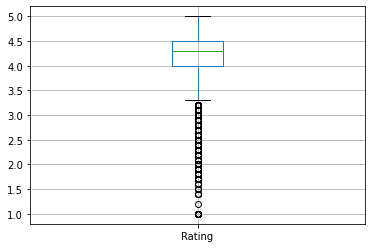

In [ ]:
# lets plot a Box plot for rating colum to get some idea about the rating columns
playstore_df.boxplot(column=['Rating']);

From above observaion we can see there are values which are greater than 5. The raing of any apps has to be max 5 not greater than it so lets try to find oy this outlier

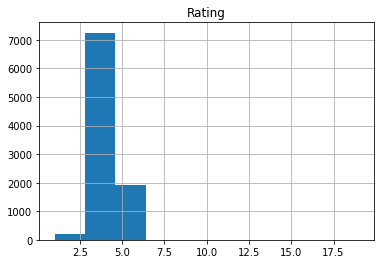

In [ ]:
playstore_df.hist("Rating");

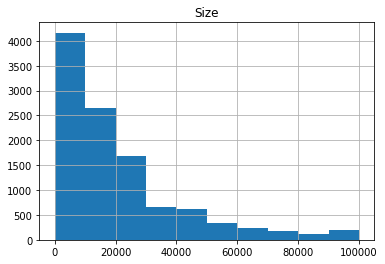

In [ ]:
playstore_df.hist("Size");

In [ ]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Find Null Value
playstore_df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Lets find out which row it is
playstore_df[playstore_df["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# The category, Rating and Reviews Column have irregular data so i'am dropping this row having an index 10472
playstore_df.drop([10472], inplace = True)

###2.1 Conversion of Column:Reviews from object to float type

In [ ]:
# Print the data typre of reviews column
playstore_df['Reviews'].dtype

dtype('O')

*   Direct conversion of Reviews column may get some error if column contains any alphabets and special characters (non -digit)
*   So in order to check we can use isnumeric function (to check if it contains only digits or not) to determine the no of rows having irregular data for conversion



In [ ]:
playstore_df[~playstore_df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


As we see there are no string values in Reviews column we can now convert it into the number

In [ ]:
# Converting the values from object to float
print(playstore_df["Reviews"].dtype)
playstore_df["Reviews"]=playstore_df["Reviews"].astype('int64')
playstore_df["Reviews"].dtype

object


dtype('int64')

In [ ]:
playstore_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

###Conversion of Column size from Object to Float

    *By looking at the unique data present in the size column we have
    1.Numbers like 8M, 10M etc which denotes that these data have MegaBytes as its unit
    2.Numbers like 8.5k, 23k, 1020k etc which denotes that these data have Kilobytes as unit
    *So here lets convert all the units to Kilobyte for data analysis

In [ ]:
# Creating the function to convert the all size to kilobyte units
def convert_to_kilobytes(size):
    #IF data telling us the size varies with the time then lets assign nan value to it
    if size =='Varies with device':
      return np.nan
    # IF the data contains M it removes the M converts it to float and it will be Multiplied to Float
    elif "M" in size:
      size = size.replace("M","")
      size = float(size)
      return round(size*1000,2)
    elif "k" in size:
      size = size.replace("k","")
      size = float(size)
      return round(size,2)
# checking our Functions
convert_to_kilobytes('4566968566M')\
,convert_to_kilobytes('4659666k')\
,convert_to_kilobytes('Varies with device')

(4566968566000.0, 4659666.0, nan)

In [ ]:
values= playstore_df["Size"].apply(convert_to_kilobytes)

In [ ]:
values.shape

(10840,)

In [ ]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Converting the sizes to kilobyte unit
playstore_df.Size = playstore_df.Size.apply(convert_to_kilobytes)

In [ ]:
# Checking the head of size conversion
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###Coversion of Column Install to Integer

In [ ]:
# first lets check the Unizue values in it
playstore_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)



*   SO from above observation we can see there are only "+ " Symbols in it



In [ ]:
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace('+',"") if "+" in str(x) else str (x))
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace(',',"") if "," in str(x) else str (x))

In [ ]:
# Checking the head of size conversion
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstore_df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

###DATA CLEANING

In [ ]:
# presenting the erroes of the dataset in the dataframe Format

In [ ]:
null_values_tables = pd.DataFrame({"No. of Null Values": playstore_df.isnull().sum().sort_values(ascending = False),
                                    "% of Null Values":(playstore_df.isnull().sum().sort_values(ascending = False)
                                                        /playstore_df.shape[0])*100})
print(null_values_tables)


                No. of Null Values  % of Null Values
Size                          1695         15.636531
Rating                        1474         13.597786
Current Ver                      8          0.073801
Android Ver                      2          0.018450
Type                             1          0.009225
App                              0          0.000000
Category                         0          0.000000
Reviews                          0          0.000000
Installs                         0          0.000000
Price                            0          0.000000
Content Rating                   0          0.000000
Genres                           0          0.000000
Last Updated                     0          0.000000


1.15% of Size column are NaN

2.13% of Rating columns are NaN

3.Current Version with 8 NaN 4.Andriod version with 2 and

4.Type with 1 NaN

### 3.1 Handling missing values for Size

    Adding overall mean values to the Size column might not feel appropriate as becasue usually

    Apps with category like Games will have more size and Apps with category of health will have slightly lesser size compared to games

    By looking at the table below we can tell that GAME has average maximum value followed by FAMILY and TRAVEL_AND_LOCAL and SPORTS and so on ...

    Conclusion - Group the apps by category and fill the mean values for missing places of there corresponding category

In [ ]:
#sorting te mean values of all category
category_mean = playstore_df.groupby("Category").mean().sort_values("Size",ascending= False)["Size"]

In [ ]:
print(category_mean)

Category
GAME                   44370.098522
FAMILY                 28319.250546
TRAVEL_AND_LOCAL       24654.494792
SPORTS                 24339.012862
HEALTH_AND_FITNESS     22769.212121
PARENTING              22512.962963
FOOD_AND_DRINK         22185.000000
ENTERTAINMENT          21853.333333
EDUCATION              20790.828829
AUTO_AND_VEHICLES      20037.146667
MEDICAL                19629.039171
FINANCE                17928.566775
SOCIAL                 17681.871429
PHOTOGRAPHY            17367.665354
DATING                 16625.556604
MAPS_AND_NAVIGATION    16614.712963
SHOPPING               16175.427861
VIDEO_PLAYERS          16084.580153
HOUSE_AND_HOME         15978.764706
LIFESTYLE              14754.498551
BUSINESS               14472.162500
EVENTS                 13963.754386
BEAUTY                 13795.744681
COMICS                 13485.352941
BOOKS_AND_REFERENCE    13310.822335
WEATHER                13124.245614
NEWS_AND_MAGAZINES     13023.648148
PRODUCTIVITY       

In [ ]:
# Storing the null values with mean of the category
playstore_df.loc[playstore_df["Size"].isna(),["Size"]]=\
playstore_df.loc[playstore_df.Size.isna()].apply(lambda x: round(category_mean[x['Category']],2),axis=1)

In [ ]:
# presenting the erroes of the dataset in the dataframe Format
null_values_tables = pd.DataFrame({"No. of Null Values":playstore_df.isnull().sum().sort_values(ascending=False),
                                   "% of Null Values":(playstore_df.isnull().sum().sort_values(ascending=False)
                                   /playstore_df.shape[0])*100})


In [ ]:
null_values_tables

,No. of Null Values,% of Null Values
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Price,0,0.000000


In [ ]:
# Data Visualization
grp = playstore_df.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(z)


Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

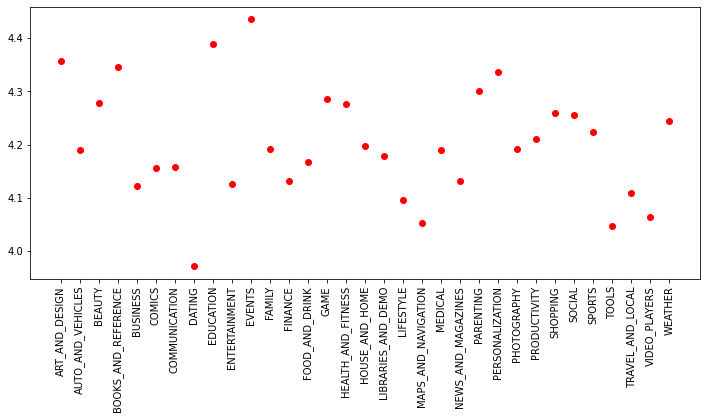

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(x, 'ro')
plt.xticks(rotation=90)
plt.show()

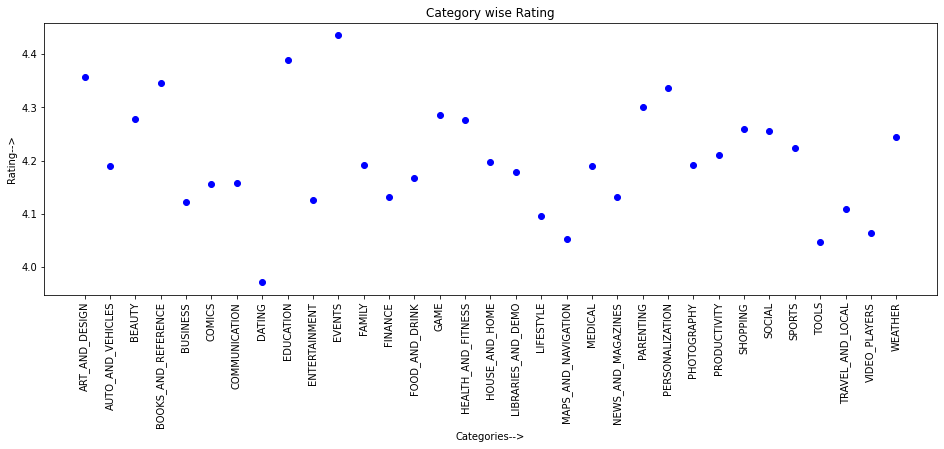

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(x, 'ro', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

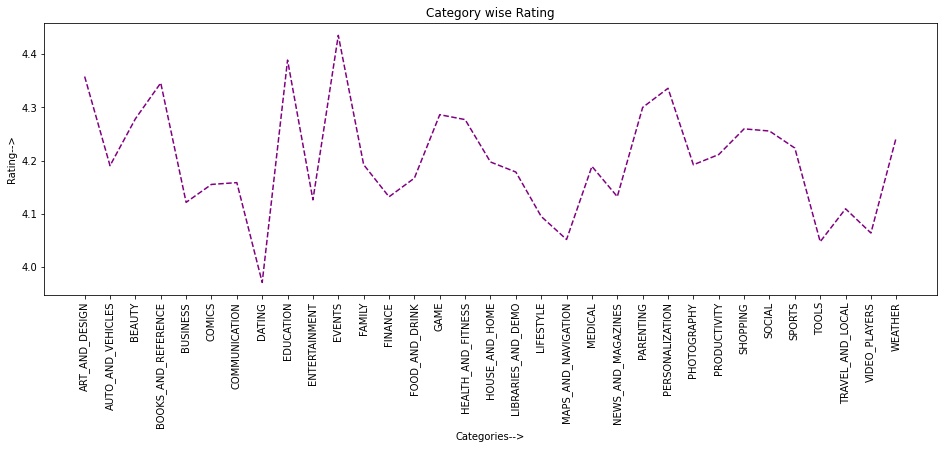

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(x, 'r--', color='purple')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

In [ ]:
user_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
missing_review = user_review.isna().sum().sort_values(ascending=True)/ len(user_review)

In [ ]:
missing_review

App                       0.000000
Sentiment                 0.417809
Sentiment_Polarity        0.417809
Sentiment_Subjectivity    0.417809
Translated_Review         0.417886
dtype: float64

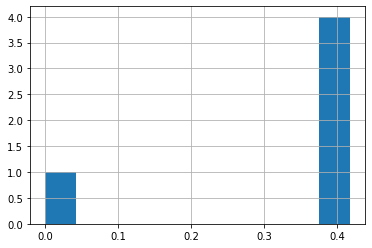

In [ ]:
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


##SUMMARY AND CONCLUSIONS

The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. Dataset can also be used to look whether the original ratings of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store

##FUTURE WORK

Exploring the correlation between the size of the app and the version of Android on the number of installs. Exploring reviews and sentiment of the users as per the the category of the application.